In [1]:
import numpy as np
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import independence_nn

In [2]:
def make_chaos_data(n_samples=300, gamma=.5):
    """ Make chaotic data (see paper for more info)."""
    x = np.zeros((n_samples, 4))
    y = np.zeros((n_samples, 4))
    x[-1, :] = np.random.randn(4) * .01
    y[-1, :] = np.random.randn(4) * .01
    for step_id in range(n_samples):
        x[step_id, 0] = 1.4 - x[step_id-1, 0]**2 + .3 * x[step_id-1, 1]
        y[step_id, 0] = (1.4 - (gamma * x[step_id-1, 0] * y[step_id-1, 0]
                                + (1 - gamma) * y[step_id-1, 0]**2) +
                         .1 * y[step_id-1, 1])
        x[step_id, 1] = x[step_id-1, 0]
        y[step_id, 1] = y[step_id-1, 0]
    x[:, 2:] = np.random.randn(n_samples, 2) * .5
    y[:, 2:] = np.random.randn(n_samples, 2) * .5
    return x, y

Training epoch 109, time 1s. Tr loss 0.3993, val loss 1.406.Trainig done in 109 epochs, 1.50229382515s. Validation loss 1.218.
D1 statistic, permutation 0: 0.303766497125
Training epoch 109, time 1s. Tr loss 0.4392, val loss 1.034.Trainig done in 109 epochs, 1.66431188583s. Validation loss 0.8493.
D1 statistic, permutation 1: 0.272847401261
Training epoch 109, time 1s. Tr loss 0.4304, val loss 0.6789.Trainig done in 109 epochs, 1.8714568615s. Validation loss 0.4954.
D1 statistic, permutation 2: 0.312166845092
Training epoch 109, time 1s. Tr loss 0.427, val loss 0.9626.Trainig done in 109 epochs, 1.72348380089s. Validation loss 0.8147.
D1 statistic, permutation 3: 0.274765882025
Training epoch 109, time 1s. Tr loss 0.4179, val loss 0.9635.Trainig done in 109 epochs, 1.68026614189s. Validation loss 0.8293.
D1 statistic, permutation 4: 0.326231288624
Training epoch 109, time 1s. Tr loss 0.4351, val loss 0.9805.Trainig done in 109 epochs, 1.61038589478s. Validation loss 0.7909.
D1 statisti

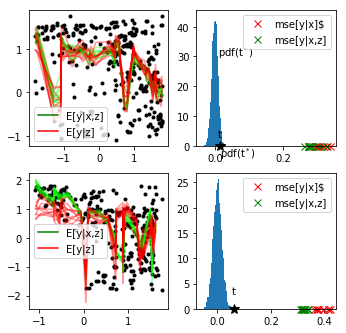

In [4]:
""" Fig. 1: Walk-through of the independence 
tester working on the Chaos dataset."""
import independence_nn
reload(independence_nn)
N_SAMPLES = 300
np.random.seed(1)
data = make_chaos_data(n_samples=N_SAMPLES)

#=====================================================
# Make data such that x is independent of y given z.
#=====================================================
x = data[0][1:]
y = data[1][:-1]
z = np.array(data[0][:-1])

# Run the independence test and retrieve testing data.
(pval, x, y, x_z, d1_preds, d0_preds, 
 d1_stats, d0_stats, t_obs, t_star, n_test) = independence_nn.indep_nn(x, y, z, max_time=30, plot_return=True)
# Plot x, y, and the prediction that uses z.
font = FontProperties()                                                                                                                                                                                      
plt.figure(figsize=(5.5, 5.5), facecolor='white')                                                                                                                                                                               
plt.subplot(2, 2, 1)                                                                                                                                                                                         
plt.plot(x[:, :1], y[:, :1], 'k.')                                                                                                                                                                           
sort_ids = np.argsort(x_z[:n_test,0])                                                                                                                                                                        
for y_pred_id, y_pred in enumerate(d1_preds):                                                                                                                                                                
    plt.plot(x_z[sort_ids, :1], y_pred[sort_ids, :1], '-',                                                                                                                                                   
             color=(0, 1, 0, .4))                                                                                                                                                                            
plt.plot(x_z[:n_test, :1], y_pred[:, :1] * np.nan, 'g-',                                                                                                                                                     
         label='E[y|x,z]')                                                                                                                                                                                   

for y_pred_id, y_pred in enumerate(d0_preds):                                                                                                                                                                
    plt.plot(x_z[sort_ids, :1], y_pred[sort_ids, :1], '-',                                                                                                                                                   
             color=(1, 0, 0, .4))                                                                                                                                                                            
plt.plot(x_z[:n_test, :1], y_pred[:, :1] * np.nan, 'r-',                                                                                                                                                     
         label='E[y|z]')                                                                                                                                                                                     

plt.legend(loc=0)                                                                                                                                                                                            

plt.subplot(2, 2, 2)                                                                                                                                                                                         
plt.hist(t_star, bins=50, normed=True)                                                                                                                                                                       
plt.plot(d0_stats, np.zeros_like(d0_stats), 'rx',                                                                                                                                                            
         label=r'mse[y|x]$', clip_on=False, ms=7)                                                                                                                                                           
plt.plot(d1_stats, np.zeros_like(d1_stats), 'gx',                                                                                                                                                            
         label='mse[y|x,z]', clip_on=False, ms=7)                                                                                                                                                           
plt.plot(t_obs, [0], 'k*', ms=10, clip_on=False)                                                                                                                                                             
font.set_weight('heavy')                                                                                                                                                                                     
plt.text(t_obs-.007, 3, r't')#, fontproperties=font)                                                                                                                                                           
plt.text(.01, 30, r'pdf(t$^*$)')#, fontproperties=font)                                                                                                                                                        
plt.legend(loc=0)                                                                                                                                                                                            

#=====================================================
# Make data such that x is dependent on y given z.
#=====================================================

x = data[1][1:]
y = data[0][:-1]
z = np.array(data[1][:-1])

# Run the independence test and retrieve testing data.
(pval, x, y, x_z, d1_preds, d0_preds, 
 d1_stats, d0_stats, t_obs, t_star, n_test) = independence_nn.indep_nn(x, y, z, max_time=30, plot_return=True)
# Plot x, y, and the prediction that uses z.
font = FontProperties()                                                                                                                                                                                      
plt.subplot(2, 2, 3)                                                                                                                                                                                         
plt.plot(x[:, :1], y[:, :1], 'k.')                                                                                                                                                                           
sort_ids = np.argsort(x_z[:n_test,0])                                                                                                                                                                        
for y_pred_id, y_pred in enumerate(d1_preds):                                                                                                                                                                
    plt.plot(x_z[sort_ids, :1], y_pred[sort_ids, :1], '-',                                                                                                                                                   
             color=(0, 1, 0, .4))                                                                                                                                                                            
plt.plot(x_z[:n_test, :1], y_pred[:, :1] * np.nan, 'g-',                                                                                                                                                     
         label='E[y|x,z]')                                                                                                                                                                                   

for y_pred_id, y_pred in enumerate(d0_preds):                                                                                                                                                                
    plt.plot(x_z[sort_ids, :1], y_pred[sort_ids, :1], '-',                                                                                                                                                   
             color=(1, 0, 0, .4))                                                                                                                                                                            
plt.plot(x_z[:n_test, :1], y_pred[:, :1] * np.nan, 'r-',                                                                                                                                                     
         label='E[y|z]')                                                                                                                                                                                     

plt.legend(loc=0)                                                                                                                                                                                            

plt.subplot(2, 2, 4)                                                                                                                                                                                         
plt.hist(t_star, bins=50, normed=True)                                                                                                                                                                       
plt.plot(d0_stats, np.zeros_like(d0_stats), 'rx',                                                                                                                                                            
         label=r'mse[y|x]$', clip_on=False, ms=7)                                                                                                                                                           
plt.plot(d1_stats, np.zeros_like(d1_stats), 'gx',                                                                                                                                                            
         label='mse[y|x,z]', clip_on=False, ms=7)                                                                                                                                                           
plt.plot(t_obs, [0], 'k*', ms=10, clip_on=False)                                                                                                                                                             
font.set_weight('heavy')                                                                                                                                                                                     
plt.text(t_obs-.007, 3, r't')#, fontproperties=font)                                                                                                                                                           
plt.text(.01, 30, r'pdf(t$^*$)')#, fontproperties=font)                                                                                                                                                        
plt.legend(loc=0)                                                                                                                                                                                            
plt.show()                                                                                                                                                                                                   

